# Classification models
Here, I test several classification models, using the [wine dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html).

In [1]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split  # holdout split
from sklearn.model_selection import KFold  # k-fold split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [2]:
# load wine dataset
wine = load_wine()
# conversão para dataframe
dataset = pd.DataFrame(wine.data, columns=wine.feature_names)
dataset["target"] = wine.target  # adição da coluna target
dataset.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


#### Split dataset into X (features) and y (target)

In [4]:
X = dataset.drop("target", axis="columns")
y = dataset["target"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=7
)

# Creating folds for cross-validation
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=7)

#### Selecting models
Here, I'll test the following models
* **KNN**: KNeighbors Classifier
* **CART**: Decision Tree Classifier
* **NB**: Gaussian Noise.
* **SVM**: Suport Vector Machine, used to classification.

In [23]:
models = [
    ("KNN", KNeighborsClassifier()),
    ("CART", DecisionTreeClassifier()),
    ("NB", GaussianNB()),
    ("SVM", SVC()),
]

In [8]:
metrics = list()
results = list()
names = list()

# Avaliando um modelo por vez
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")

    results.append(cv_results)
    names.append(name)
    metrics.append(
        {"name": name, "accuracy": cv_results.mean(), "std": cv_results.std()}
    )

pd.DataFrame(metrics).sort_values(by="accuracy", ascending=False)

,name,accuracy,std
2,NB,0.971429,0.047380
1,CART,0.844762,0.043654
3,SVM,0.683333,0.078282
0,KNN,0.675238,0.087929


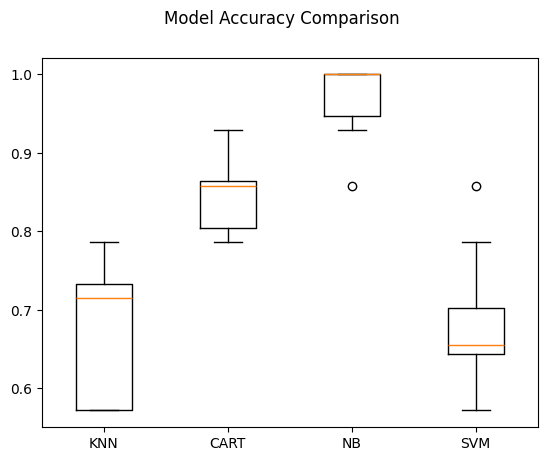

In [9]:
fig = plt.figure()
fig.suptitle("Model Accuracy Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Confusion matrix
Now, I will train models with the entire training set, and evaluate their performance with the test set.


In [ ]:
def make_confusion_matrix(
    y_true,
    y_pred,
    classes=None,
    figsize=(10, 10),
    text_size=15,
    title="Confusion Matrix",
):
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.

    If classes is passed, confusion matrix will be labelled, if not, integer class values
    will be used.

    Args:
      y_true: Array of truth labels (must be same shape as y_pred).
      y_pred: Array of predicted labels (must be same shape as y_true).
      classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
      figsize: Size of output figure (default=(10, 10)).
      text_size: Size of output figure text (default=15).

    Returns:
      A labelled confusion matrix plot comparing y_true and y_pred.

    Example usage:
      make_confusion_matrix(y_true=test_labels, # ground truth test labels
                            y_pred=y_preds, # predicted labels
                            classes=class_names, # array of class label names
                            figsize=(15, 15),
                            text_size=10)
    """  # noqa: E999
    # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # normalize it
    n_classes = cm.shape[0]  # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(
        cm, cmap=plt.cm.Blues
    )  # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(
        title=title,
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),  # create enough axis slots for each class
        yticks=np.arange(n_classes),
        # axes will labeled with class names (if they exist) or ints
        xticklabels=labels,
        yticklabels=labels,
    )

    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.0

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size,
        )

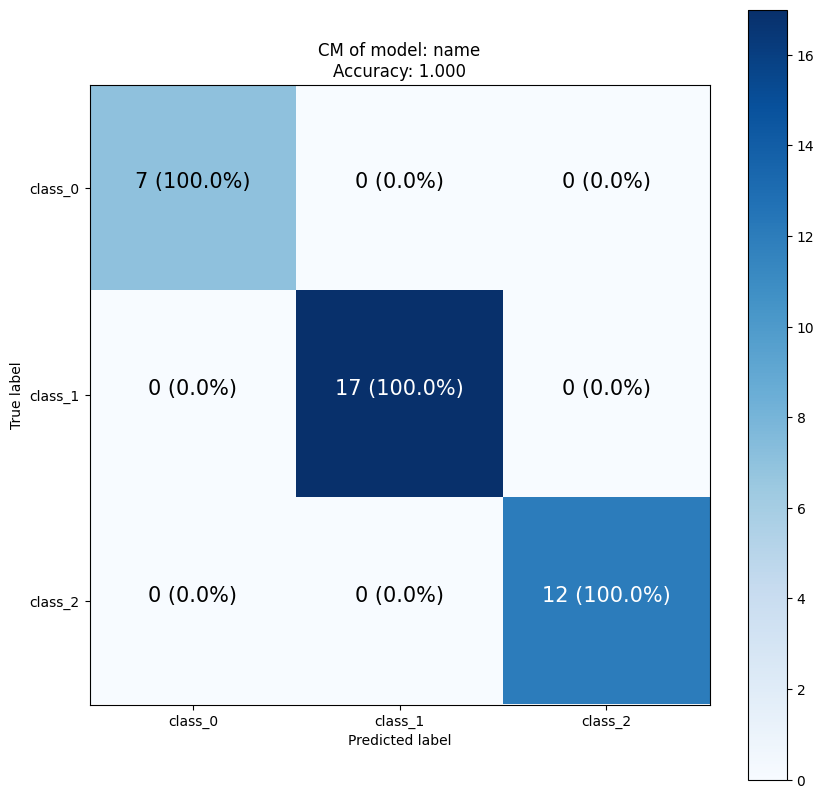

In [27]:
model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
acc = accuracy_score(y_test, predictions)

make_confusion_matrix(
    y_true=y_test,
    y_pred=predictions,
    classes=wine.target_names.tolist(),
    title=f"CM of model: {name}\nAccuracy: {acc:.3f}",
)

In [28]:
print(classification_report(y_test, predictions, target_names=wine.target_names))

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00         7
     class_1       1.00      1.00      1.00        17
     class_2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

